We want to create a neural netwrok and train it to recognize handwritten numbers (after training it using the MNIST dataset)

Resources: Hand Written Digits notebook from class and
https://www.mlq.ai/convolutional-neural-network-python-keras/ 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model
from keras.utils.vis_utils import plot_model

from google.colab.patches import cv2_imshow

The MNIST database (Modified National Institute of Standards and Technology databasE) is a large database of handwritten digits. 

Load and split the datasest.

In [2]:
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

Check what our x_train, y_train, x_test, and y_test consist of.

In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Check some of the handwritten digits that are being used to train.

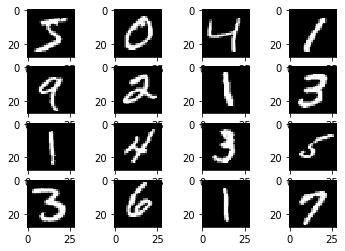

In [7]:
fig = plt.figure()
for x in range(16):
  plt.subplot(4,4 ,x+1)
  plt.imshow(x_train[x], cmap = plt.cm.gray, interpolation = 'nearest')

In [8]:
for x in range(16):
  print(y_train[x])

5
0
4
1
9
2
1
3
1
4
3
5
3
6
1
7


The batch size is the number of samples processed before the model is updated.

The number of epochs is the number of complete passes through the training dataset.

The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.

Set the batch size and epochs

In [9]:
batch_size = 128
epochs = 5

Next, we will flatten our dataset from images that are structured as 28 by 28 pixels to a vector that has 784 pixel input values.

Input image dimensions; 28x28 pixel images. I.e., img_rows, img_cols = 28, 28

In [10]:
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

In [11]:
img_rows

28

In [12]:
img_cols

28

Next we reshape our data for Keras by adding a 4th dimension to 

We will also normalize the pixel values from grayscale, which are between 0 and 255 to a range between 0 and 1. We do this by dividing each by 255

In [13]:
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [14]:
# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

In [15]:
# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [16]:
# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

In [17]:
print(input_shape)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'testing samples')

(28, 28, 1)
x_train shape: (60000, 28, 28, 1)
60000 training samples
10000 testing samples


One hot encoding can be defined as the essential process of converting the categorical data variables to be provided to machine and deep learning algorithms which in turn improve predictions as well as classification accuracy of a model.

This will convert the class vectors into binary class matrices. For example, let's say the digit is a 2 we will convert the vector from [0 1 2 3 4 5 6 7 8 9] to  [0 0 1 0 0 0 0 0 0 0].

In [18]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [19]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [20]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

Number of Classes: 10


In [22]:
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

In [23]:
num_classes

10

In [24]:
num_pixels

784

We will now define our neural network model, which as mentioned will use TensorFlow as the model's backend.

The structure of our convolutional neural network architecture is defined below:

1. The first hidden layer Conv2D is a convolutional layer that has 32 feature maps, each with a size of 3 x 3 and we are using a rectified linear activation function - relu.
  - The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

2. We then add another convolutional layer with 64 feature maps

3. We then add a pooling layer MaxPooling2D1 that is configured with a pool size of 2 x 2

4. We then apply a regularization layer using Dropout that is set to randomly exclude 25% of the neurons in the layer - this is used to reduce overfitting

5. We then convert the 2-dimensional matrix into a vector using Flatten - this allows our output to be processed by fully connected layers

6. Next, we add a fully connected layer that has 128 neurons and a ReLU activation function

7. We will then add another regularization layer to reduce overfitting, this time we're randomly excluding 50% of the neurons

8. We finish the neural network with an output layer that has 10 neurons  - the same as the number of classes in our classification problem and a softmax activation function. This will output a prediction of the probability that a digit belongs to each class.
  - The softmax function, also known as softargmax or normalized exponential function, converts a vector of K real numbers into a probability distribution of K possible outcomes. It is a generalization of the logistic function to multiple dimensions, and used in multinomial logistic regression. The softmax function is often used as the last activation function of a neural network to normalize the output of a network to a probability distribution over predicted output classes, based on Luce's choice axiom.

In [25]:
# create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Let's finalized the model and make it ready for use. 


Cross entropy loss function is an optimization function which is used in case of training a classification model which classifies the data by predicting the probability of whether the data belongs to one class or the other class.

In [26]:
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

In [27]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

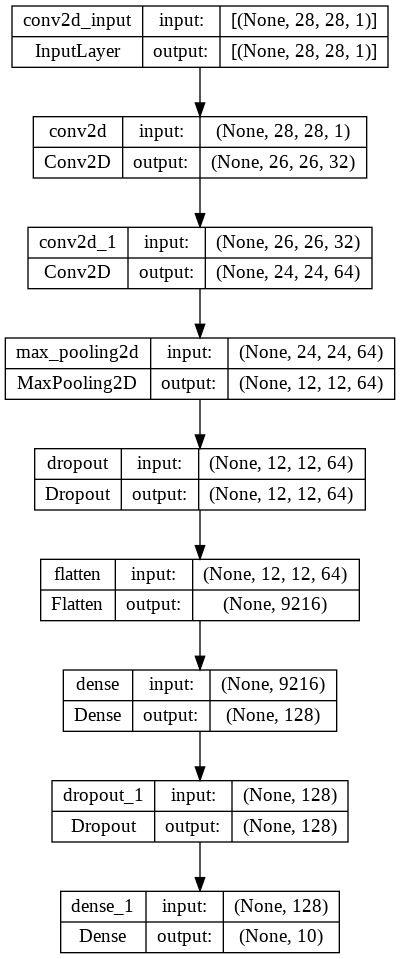

In [28]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Let's fit the model

In [30]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 181s 386ms/step - loss: 2.2658 - accuracy: 0.1924 - val_loss: 2.2269 - val_accuracy: 0.3901
Epoch 2/5
469/469 [==============================] - 168s 359ms/step - loss: 2.2033 - accuracy: 0.3165 - val_loss: 2.1483 - val_accuracy: 0.5419
Epoch 3/5
469/469 [==============================] - 169s 360ms/step - loss: 2.1209 - accuracy: 0.4099 - val_loss: 2.0412 - val_accuracy: 0.6202
Epoch 4/5
469/469 [==============================] - 169s 360ms/step - loss: 2.0083 - accuracy: 0.4820 - val_loss: 1.8968 - val_accuracy: 0.6714
Epoch 5/5
469/469 [==============================] - 169s 360ms/step - loss: 1.8602 - accuracy: 0.5370 - val_loss: 1.7100 - val_accuracy: 0.7141


Now we can evaluate the model and get the accuracy score

In [31]:
score = model.evaluate(x_test, y_test, verbose = 0)

In [32]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.7100340127944946
Test accuracy: 0.7141000032424927


What are contours?
Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
Since OpenCV 3.2, findContours() no longer modifies the source image but returns a modified image as the first of three return parameters.
In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.

In [33]:
def x_cord_contour(contour):
    # This function take a contour from findContours
    # it then outputs the x centroid coordinates
    M = cv2.moments(contour)
    return (int(M['m10']/M['m00']))

In [34]:
def makeSquare(not_square):
    # This function takes an image and makes the dimenions square
    # It adds black pixels as the padding where needed

    BLACK = [0,0,0]
    img_dim = not_square.shape
    height = img_dim[0]
    width = img_dim[1]
    #print("Height = ", height, "Width = ", width)
    if (height == width):
        square = not_square
        return square
    else:
        doublesize = cv2.resize(not_square,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
        height = height * 2
        width = width * 2
        #print("New Height = ", height, "New Width = ", width)
        if (height > width):
            pad = int((height - width)/2)
            #print("Padding = ", pad)
            doublesize_square = cv2.copyMakeBorder(doublesize,0,0,pad,pad,cv2.BORDER_CONSTANT,value=BLACK)
        else:
            pad = (width - height)/2
            #print("Padding = ", pad)
            doublesize_square = cv2.copyMakeBorder(doublesize,pad,pad,0,0,\
                                                   cv2.BORDER_CONSTANT,value=BLACK)
    doublesize_square_dim = doublesize_square.shape
    #print("Sq Height = ", doublesize_square_dim[0], "Sq Width = ", doublesize_square_dim[1])
    return doublesize_square

In [35]:
def resize_to_pixel(dimensions, image):
    # This function then re-sizes an image to the specificied dimenions

    buffer_pix = 4
    dimensions  = dimensions - buffer_pix
    squared = image
    r = float(dimensions) / squared.shape[1]
    dim = (dimensions, int(squared.shape[0] * r))
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    img_dim2 = resized.shape
    height_r = img_dim2[0]
    width_r = img_dim2[1]
    BLACK = [0,0,0]
    if (height_r > width_r):
        resized = cv2.copyMakeBorder(resized,0,0,0,1,cv2.BORDER_CONSTANT,value=BLACK)
    if (height_r < width_r):
        resized = cv2.copyMakeBorder(resized,1,0,0,0,cv2.BORDER_CONSTANT,value=BLACK)
    p = 2
    ReSizedImg = cv2.copyMakeBorder(resized,p,p,p,p,cv2.BORDER_CONSTANT,value=BLACK)
    img_dim = ReSizedImg.shape
    height = img_dim[0]
    width = img_dim[1]
    #print("Padded Height = ", height, "Width = ", width)
    return ReSizedImg

In [37]:
model.save('cnn1.h5')

In [39]:
classifier = load_model('cnn1.h5')

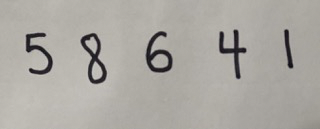

-1

In [40]:
image = cv2.imread('/content/IMG_5697 Small Small.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(image)
cv2.waitKey(0)

In [41]:
# Blur image then find edges using Canny 
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [42]:
edged = cv2.Canny(blurred, 30, 150)

In [43]:
# Find Contours
contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [44]:
#Sort out contours left to right by using their x cordinates
contours = sorted(contours, key = x_cord_contour, reverse = False)

In [45]:
# Create empty array to store entire number
full_number = []

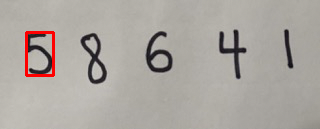

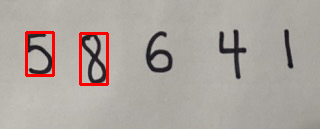

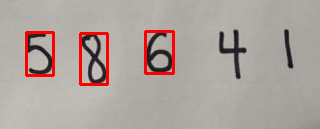

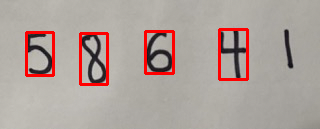

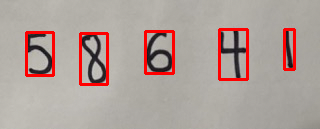

In [46]:
# loop over the contours
for c in contours:
    # compute the bounding box for the rectangle
    (x, y, w, h) = cv2.boundingRect(c)    

    if w >= 5 and h >= 25:
        roi = blurred[y:y + h, x:x + w]
        ret, roi = cv2.threshold(roi, 127, 255,cv2.THRESH_BINARY_INV)
        roi = makeSquare(roi)
        roi = resize_to_pixel(28, roi)
        cv2_imshow(roi)
        roi = roi / 255.0       
        roi = roi.reshape(1,28,28,1) 

        ## Get Prediction
        res = str(classifier.predict(roi, 1, verbose = 0)[0])
        full_number.append(res)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(image, res, (x , y + 155), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
        cv2_imshow(image)
        cv2.waitKey(0) 
        
cv2.destroyAllWindows()

In [47]:
print ("The number is: " + ''.join(full_number))

The number is: [0.10904755 0.04970337 0.08739632 0.16740318 0.0634745  0.11494023
 0.07650278 0.15395077 0.09692243 0.08065889][0.05172317 0.1182531  0.10722896 0.14200221 0.07518155 0.08786798
 0.09418948 0.11246042 0.13696028 0.07413286][0.1270035  0.03363379 0.14293483 0.10903154 0.07944395 0.11538218
 0.14169562 0.05953853 0.11743817 0.0738979 ][0.06486189 0.09499443 0.07592106 0.10645303 0.08799168 0.06699495
 0.08795452 0.17601906 0.09658381 0.14222555][0.05281585 0.14896993 0.08176856 0.10284568 0.07778658 0.08950833
 0.11196566 0.11352889 0.14621021 0.07460028]
